In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [4]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4BZ0CP5G,King,Seattle,WA,98125.0,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,349455557,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315,POINT (-122.08747 47.4466),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EB2J,King,Seattle,WA,98115.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,43.0,171417494,POINT (-122.31676 47.68156),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1C4RJXN64R,Kitsap,Bremerton,WA,98312.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,26.0,262542927,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
4,5YJ3E1EB1J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,35.0,110432815,POINT (-122.9131 47.01359),PUGET SOUND ENERGY INC,5.306701e+10


In [5]:
df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
247339,7G2CEHED0R,King,Newcastle,WA,98056.0,2024,TESLA,CYBERTRUCK,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,41.0,278417947,POINT (-122.1805 47.50006),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
247340,1C4RJYC65R,Pierce,Puyallup,WA,98374.0,2024,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,25.0,271451197,POINT (-122.27575 47.13959),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
247341,7SAYGDEE0P,King,Bothell,WA,98011.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,249563667,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
247342,KNDPYDAH9P,Kitsap,Bainbridge Island,WA,98110.0,2023,KIA,SPORTAGE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,34.0,0.0,23.0,238968376,POINT (-122.521 47.62728),PUGET SOUND ENERGY INC,5.303509e+10
247343,KNDPZDAH8P,Whatcom,Bellingham,WA,98226.0,2023,KIA,SPORTAGE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,34.0,0.0,42.0,253768637,POINT (-122.49756 48.7999),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247344 entries, 0 to 247343
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         247344 non-null  object 
 1   County                                             247340 non-null  object 
 2   City                                               247340 non-null  object 
 3   State                                              247344 non-null  object 
 4   Postal Code                                        247340 non-null  float64
 5   Model Year                                         247344 non-null  int64  
 6   Make                                               247344 non-null  object 
 7   Model                                              247344 non-null  object 
 8   Electric Vehicle Type                              247344 non-null  object

In [7]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,247340.000000,247344.000000,247324.000000,247324.000000,246791.000000,2.473440e+05,2.473400e+05
mean,98180.773999,2021.572450,44.645659,740.206308,29.039924,2.382157e+08,5.297516e+10
std,2496.155753,3.014246,82.945315,6971.140984,14.857603,6.709585e+07,1.606887e+09
min,1731.000000,2000.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,18.000000,2.089133e+08,5.303301e+10
50%,98125.000000,2023.000000,0.000000,0.000000,33.000000,2.560989e+08,5.303303e+10
75%,98382.000000,2024.000000,37.000000,0.000000,42.000000,2.723745e+08,5.305307e+10
max,99577.000000,2026.000000,337.000000,845000.000000,49.000000,4.792548e+08,6.601095e+10


In [8]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [9]:
df.shape

(247344, 17)

In [10]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        20
Base MSRP                                             20
Legislative District                                 553
DOL Vehicle ID                                         0
Vehicle Location                                      11
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

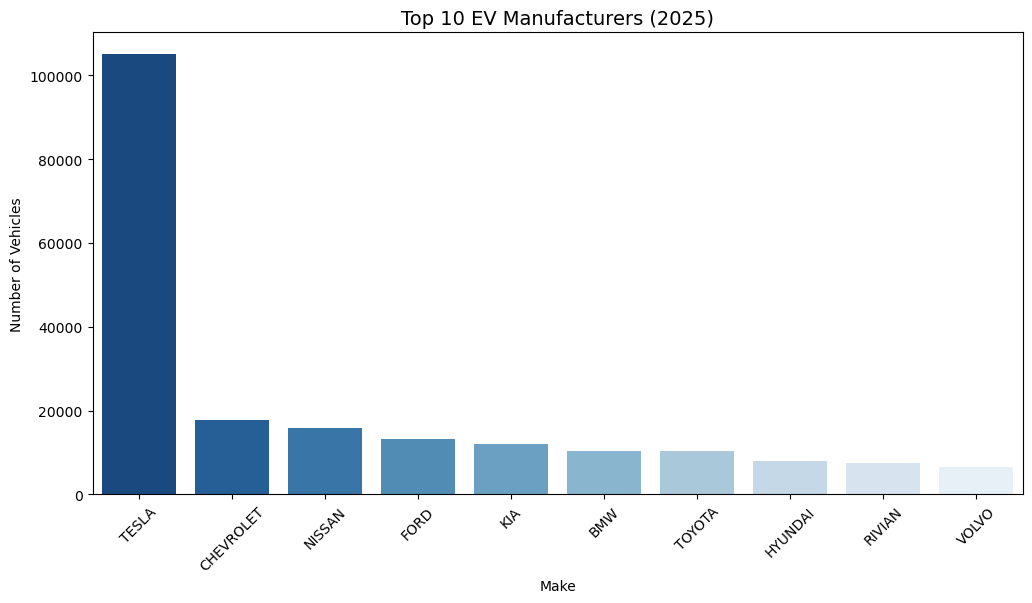

In [13]:
plt.figure(figsize=(12,6))
top_makes = df['Make'].value_counts().head(10)  # Top 10 EV manufacturers
sns.barplot(x=top_makes.index, y=top_makes.values, palette="Blues_r")
plt.title("Top 10 EV Manufacturers (2025)", fontsize=14)
plt.xlabel("Make")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45)
plt.show()

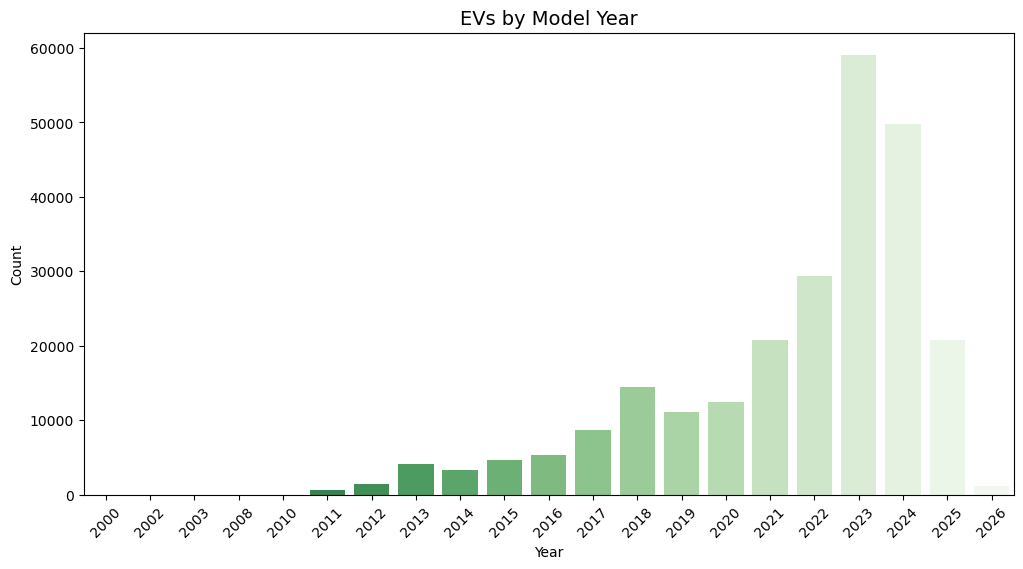

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Model Year", palette="Greens_r", order=sorted(df["Model Year"].unique()))
plt.title("EVs by Model Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

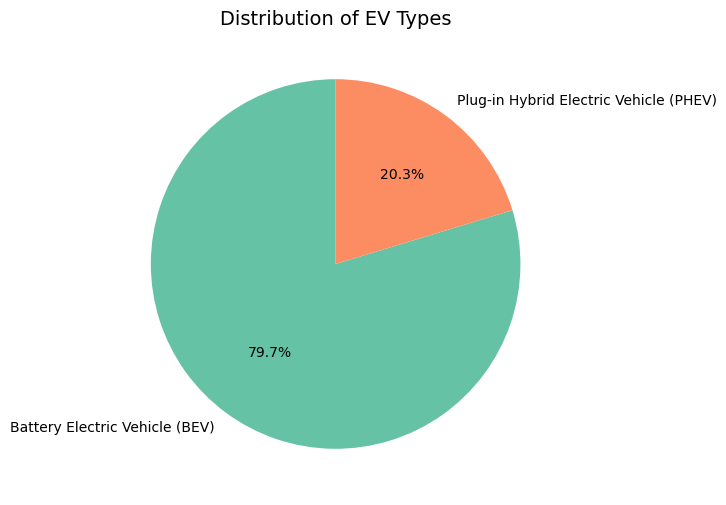

In [15]:
plt.figure(figsize=(6,6))
df['Electric Vehicle Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, 
                                                    colors=sns.color_palette("Set2"))
plt.title("Distribution of EV Types", fontsize=14)
plt.ylabel("")
plt.show()

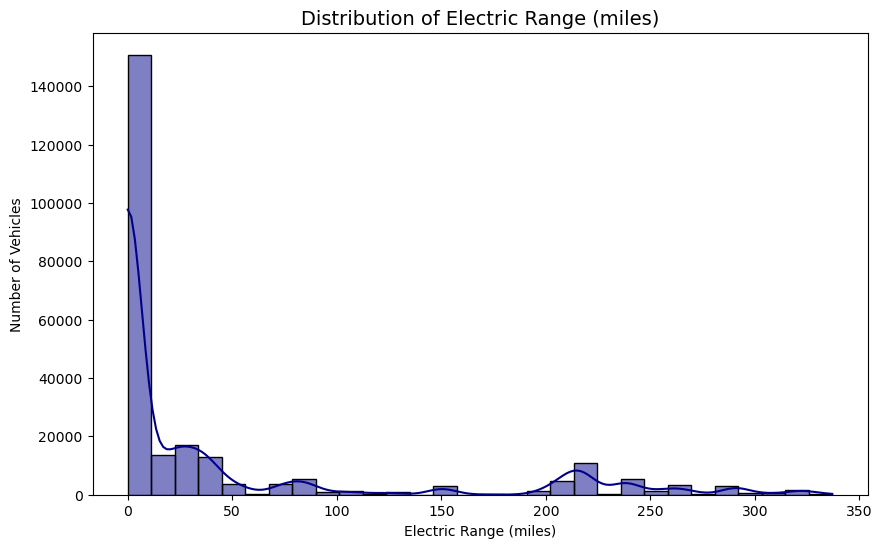

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['Electric Range'], bins=30, kde=True, color="darkblue")
plt.title("Distribution of Electric Range (miles)", fontsize=14)
plt.xlabel("Electric Range (miles)")
plt.ylabel("Number of Vehicles")
plt.show()

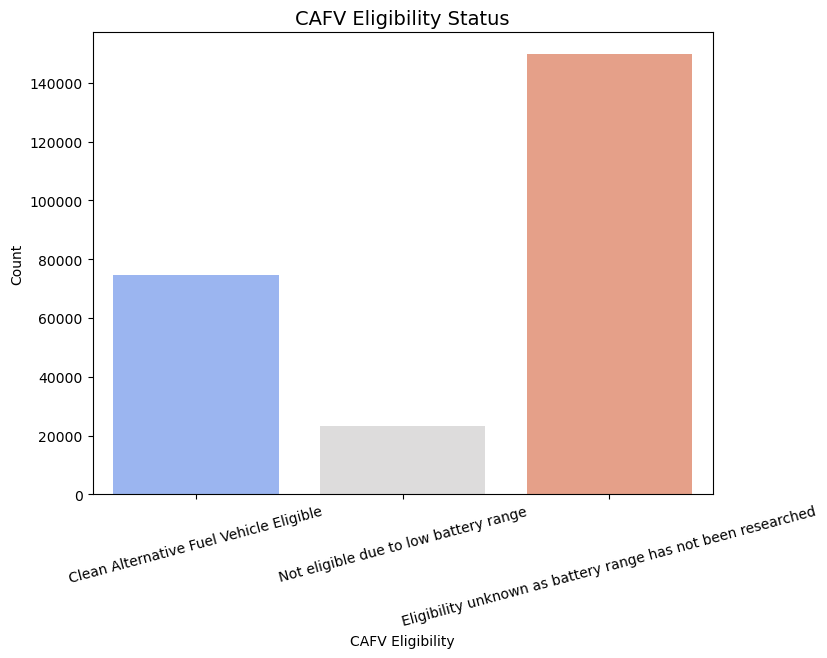

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Clean Alternative Fuel Vehicle (CAFV) Eligibility", palette="coolwarm")
plt.title("CAFV Eligibility Status", fontsize=14)
plt.xlabel("CAFV Eligibility")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.show()

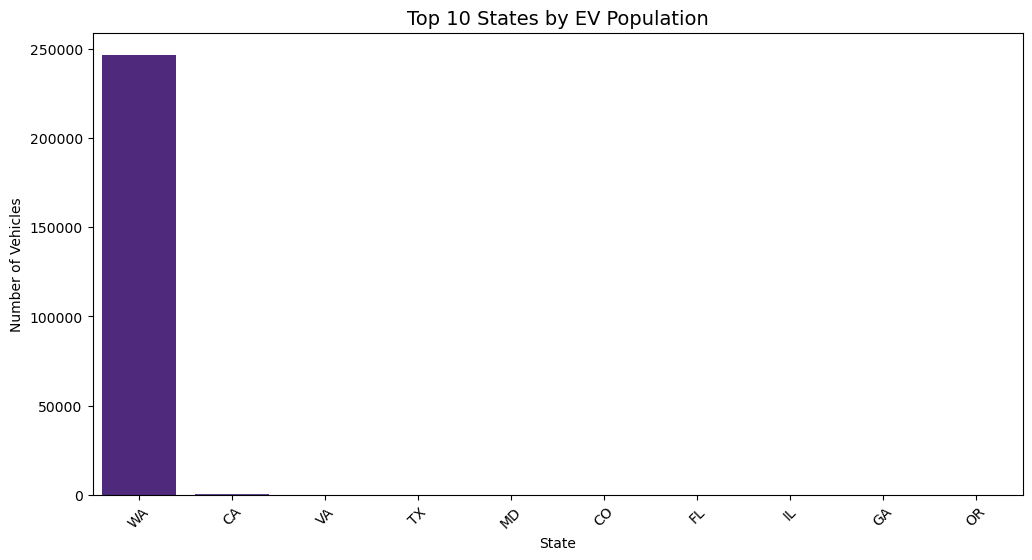

In [18]:
plt.figure(figsize=(12,6))
top_states = df['State'].value_counts().head(10)
sns.barplot(x=top_states.index, y=top_states.values, palette="Purples_r")
plt.title("Top 10 States by EV Population", fontsize=14)
plt.xlabel("State")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45)
plt.show()

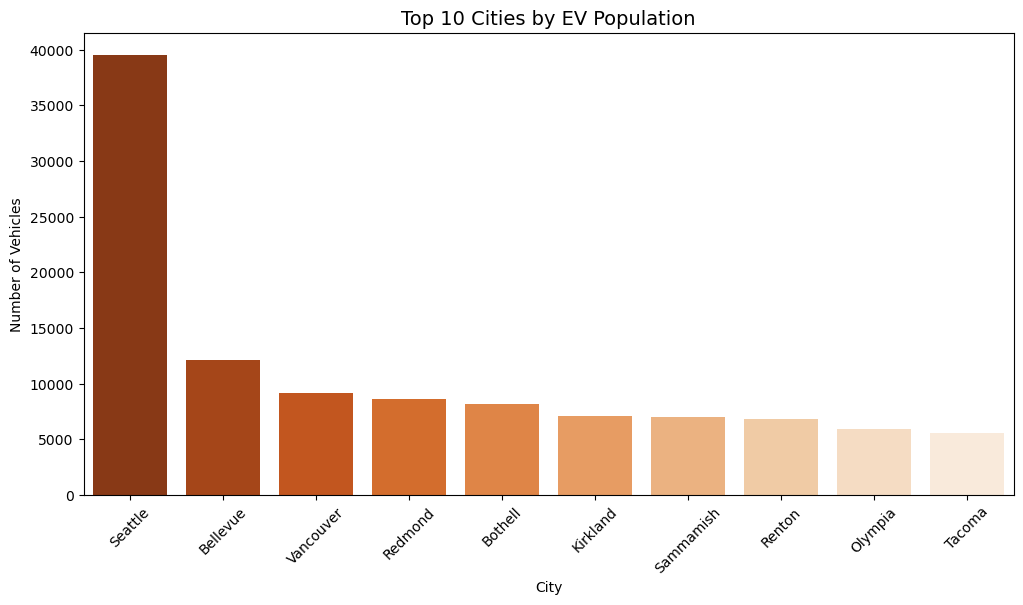

In [19]:
plt.figure(figsize=(12,6))
top_cities = df['City'].value_counts().head(10)
sns.barplot(x=top_cities.index, y=top_cities.values, palette="Oranges_r")
plt.title("Top 10 Cities by EV Population", fontsize=14)
plt.xlabel("City")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45)
plt.show()

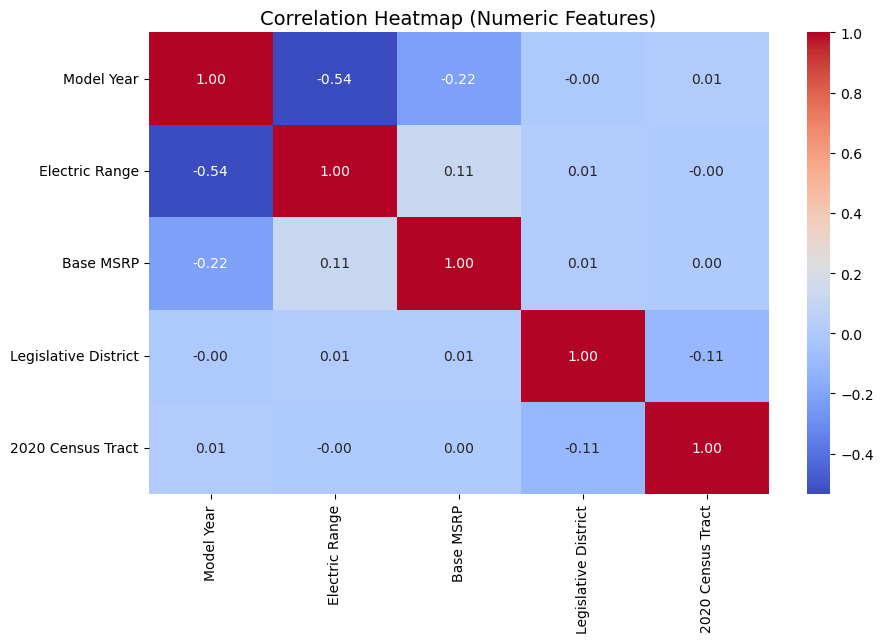

In [20]:
plt.figure(figsize=(10,6))
numeric_cols = ['Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', '2020 Census Tract']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)", fontsize=14)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [22]:
target = "Electric Vehicle Type"
X = df.drop(columns=[target])
y = df[target]

# Label Encoding
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

y_le = LabelEncoder()
y = y_le.fit_transform(y)

In [23]:
imputer = SimpleImputer(strategy="most_frequent")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [24]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, solver='lbfgs', n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, max_depth=5),
    "KNN": KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    "Naive Bayes": GaussianNB()
}

In [25]:
imputer = SimpleImputer(strategy="most_frequent")  # you can also try "mean" for numeric
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [26]:
# Encode target as well
y_le = LabelEncoder()
y = y_le.fit_transform(y)

# --- Step 3: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200, solver='lbfgs'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [29]:
import numpy as np

X_train_np = np.ascontiguousarray(X_train.to_numpy(dtype=np.float32, copy=False))
X_test_np  = np.ascontiguousarray(X_test.to_numpy(dtype=np.float32,  copy=False))
y_train_np = np.asarray(y_train)
y_test_np  = np.asarray(y_test)

results = []
for name, model in models.items():
    model.fit(X_train_np, y_train_np)
    preds = model.predict(X_test_np)
    acc = accuracy_score(y_test_np, preds) * 100
    results.append((name, acc))

results_df = pd.DataFrame(results, columns=["Algorithm", "Accuracy (%)"])
print(results_df)


             Algorithm  Accuracy (%)
0  Logistic Regression     79.704461
1        Decision Tree     99.983828
2        Random Forest     99.991914
3    Gradient Boosting     99.993936
4                  KNN     77.195820
5                  SVM     79.704461
6          Naive Bayes     79.625624
7              XGBoost     99.993936
